In [1]:
import numpy as np

import matplotlib.ticker as mtick
import wf_psf as wf
import matplotlib.pyplot as plt
import matplotlib as mpl

# %matplotlib inline
params = {
    "font.size": 18,
    "legend.fontsize": 18,
    "legend.frameon": False,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.figsize": (7, 5),
    "xtick.top": True,
    "axes.unicode_minus": False,
    "ytick.right": True,
    "xtick.bottom": True,
    "ytick.left": True,
    "xtick.major.pad": 8,
    "xtick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.major.size": 8,
    "ytick.minor.size": 4,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.linewidth": 1.5,
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": "cmr10",
    "mathtext.fontset": "cm",
    "axes.formatter.use_mathtext": True,  # needed when using cm=cmr10 for normal text
}


mpl.rcParams.update(params)

/Users/ec270266/anaconda3/envs/wavediff/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
def extract_shape_results(metrics_dicts, test_train="test"):

    if test_train == "test":
        first_key = "test_metrics"
    elif test_train == "train":
        first_key = "train_metrics"
    else:
        raise ValueError

    n_dicts = len(metrics_dicts)

    e1_rmse = np.zeros(n_dicts)
    e1_std_rmse = np.zeros(n_dicts)
    e1_rel_rmse = np.zeros(n_dicts)
    e1_std_rel_rmse = np.zeros(n_dicts)

    e2_rmse = np.zeros(n_dicts)
    e2_std_rmse = np.zeros(n_dicts)
    e2_rel_rmse = np.zeros(n_dicts)
    e2_std_rel_rmse = np.zeros(n_dicts)

    rmse_R2_meanR2 = np.zeros(n_dicts)
    std_rmse_R2_meanR2 = np.zeros(n_dicts)

    for it in range(n_dicts):
        e1_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"]["rmse_e1"]
        e1_std_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "std_rmse_e1"
        ]
        e1_rel_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "rel_rmse_e1"
        ]
        e1_std_rel_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "std_rel_rmse_e1"
        ]

        e2_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"]["rmse_e2"]
        e2_std_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "std_rmse_e2"
        ]
        e2_rel_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "rel_rmse_e2"
        ]
        e2_std_rel_rmse[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "std_rel_rmse_e2"
        ]

        rmse_R2_meanR2[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "rmse_R2_meanR2"
        ]
        std_rmse_R2_meanR2[it] = metrics_dicts[it][first_key]["shape_results_dict"][
            "std_rmse_R2_meanR2"
        ]

    e1 = [e1_rmse, e1_std_rmse, e1_rel_rmse, e1_std_rel_rmse]
    e2 = [e2_rmse, e2_std_rmse, e2_rel_rmse, e2_std_rel_rmse]
    R2 = [rmse_R2_meanR2, std_rmse_R2_meanR2]

    return e1, e2, R2

In [3]:


args = {
    'id_name': '_wf_PR_NewPRoj_12_cycles_v2' ,
    'suffix_id_name': 'v2' ,
    'base_id_name': '_wf_PR_NewPRoj_12_cycles_' ,
    'eval_only_param': False ,
    'total_cycles': 12 ,
    'saved_cycle': 'cycle12' ,
    'reset_dd_features': True ,
    'eval_only_param': False ,
    'project_dd_features': True ,
    'd_max': 2 ,
    'n_zernikes': 45 ,
    'save_all_cycles': True ,
    'n_bins_lda': 8,
    'n_bins_gt': 8,
    'output_dim': 32,
    'batch_size': 32,
    'oversampling_rate': 3.,
    'output_q': 3.,
    'sed_sigma': 0.,
    'x_lims': [0, 1e3],
    'y_lims': [0, 1e3],
    'sed_interp_kind': 'linear',
    'interp_pts_per_bin': 0,
    'extrapolate': True,
    'opt_stars_rel_pix_rmse': True ,
    'eval_mono_metric_rmse': False,
    'eval_opd_metric_rmse': True,
    'eval_train_shape_sr_metric_rmse': True,
    'pupil_diameter': 256 ,
    'n_epochs_param_multi_cycle': "0" ,
    'n_epochs_non_param_multi_cycle': "75" ,
    'l_rate_non_param_multi_cycle': "0.1" ,
    'l_rate_param_multi_cycle': "0" ,
    'l_rate_param': None,
    'l_rate_non_param': None,
    'n_epochs_param': None,
    'n_epochs_non_param': None,
    'model': 'poly' ,
    'model_eval': 'poly' ,
    'cycle_def': 'complete' ,
    'gt_n_zernikes': 45 ,
    'd_max_nonparam': 5 ,
    'saved_model_type': 'external' ,
    'use_sample_weights': True ,
    'l2_param': 0. ,
    'interpolation_type': 'none' ,
    'eval_batch_size': 16 ,
    'train_opt': True ,
    'eval_opt': True ,
    'plot_opt': True ,
    'dataset_folder': '/disk/xray0/tl3/datasets/wf-phase-retrieval/data/',
    'test_dataset_file': 'test_Euclid_res_id_010_8_bins.npy',
    'train_dataset_file': 'train_Euclid_res_2000_TrainStars_id_010_8_bins.npy',
    'base_path': '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/output_v1/',
    'metric_base_path': '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/output_v1/metrics/',
    'chkp_save_path': '/Users/tl255879/Documents/research/projects/wf-projects/phase-retrieval-paper/v1_trained_models/output_v1/chkp/chkp_callback_poly_wf_PR_NewPRoj_12_cycles_v2_cycle%d',
    'plots_folder': 'plots/' ,
    'model_folder': 'chkp/' ,
    'log_folder': 'log-files/' ,
    'optim_hist_folder': 'optim-hist/' ,
    'star_numbers': 1 ,
}


In [4]:

base_path = '/Users/ec270266/Documents/Phd/Euclid/dev/phase_retrieval/wf-psf/papers/phase_retrieval_2024/data/paper_output_v1/'
log_folder = 'log-files/'
metric_base_path = '/Users/ec270266/Documents/Phd/Euclid/dev/phase_retrieval/wf-psf/papers/phase_retrieval_2024/data/paper_output_v1/full_metrics/'
original_metrics_base_path = '/Users/ec270266/Documents/Phd/Euclid/dev/phase_retrieval/wf-psf/papers/phase_retrieval_2024/data/paper_output_v1/metrics/'


args['base_path'] = base_path
args['log_folder'] = log_folder
args['metric_base_path'] = metric_base_path
args['original_metrics_base_path'] = original_metrics_base_path


save_dir = './../plots/'
plot_results = True


e1_req_euclid = 2e-04
e2_req_euclid = 2e-04
R2_req_euclid = 1e-03



In [5]:
# metrics_base_id_name_list = [
#     'metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
#     'only_param_eval/metrics-poly_wf_PR_NewPRoj_12_cycles_v2',
# ]

metrics_base_id_name_list = [
    'metrics-poly_wf_PR_NewPRoj_12_cycles_full_eval_v0_',
    'metrics-poly_wf_PR_NewPRoj_12_cycles_onlyparam_eval_v0_',
]


eval_cycle_base_id_list = [12,12]#,12,18,18,16,12,14]
metrics = []
it = 0
# Iterate over the base_ids
for base_id, total_cycles in zip(metrics_base_id_name_list, eval_cycle_base_id_list):
    # Define the list of cycles
    eval_cycle_list = np.arange(1,total_cycles+1)
    metrics.append([])
    # Iterate over the cycles
    for eval_cycle in eval_cycle_list:
        loaded_metrics = np.load(
            args['metric_base_path'] + base_id + 'cycle' + str(eval_cycle) + '.npy' ,
            allow_pickle=True
        )[()]
        metrics[it].append(loaded_metrics)
        

    it += 1

# Load original metrics for comparison
runs = [0,2,3]
opd_original = []
opd_original_std = []
x1_pixel_original = []
x1_pixel_original_std = []
SR_pixel_original = []
SR_pixel_original_std = []
e1_original = []
e2_original = []
R_original = []
e1_original_std = []
e2_original_std = []
R_original_std = []
for i in runs:
    loaded_metrics_orig = np.load(
            args['original_metrics_base_path'] + 'metrics-poly_wf_PR_benchmark_2_cycles_v' + str(i) + '.npy',
            allow_pickle=True
    )[()]
    opd_original.append(loaded_metrics_orig['test_metrics']['opd_metric']['rel_rmse_opd'])
    opd_original_std.append(loaded_metrics_orig['test_metrics']['opd_metric']['rel_rmse_std_opd'])
    x1_pixel_original.append(loaded_metrics_orig['test_metrics']['poly_metric']['rel_rmse'])
    x1_pixel_original_std.append(loaded_metrics_orig['test_metrics']['poly_metric']['std_rel_rmse'])
    SR_pixel_original.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['rel_pix_rmse'])
    SR_pixel_original_std.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['rel_pix_rmse_std'])
    e1_original.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['rmse_e1'])
    e2_original.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['rmse_e2'])
    R_original.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['rmse_R2_meanR2'])
    e1_original_std.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['std_rmse_e1'])
    e2_original_std.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['std_rmse_e2'])
    R_original_std.append(loaded_metrics_orig['test_metrics']['shape_results_dict']['std_rmse_R2_meanR2'])

    

In [6]:
print("OPD results original:")
print(np.around(opd_original,2), " +/- ", np.around(opd_original_std,2))
print("Pixel x1 results original:")
print(np.around(x1_pixel_original,2), " +/- ", np.around(x1_pixel_original_std,2))
print("SR pixel results original:")
print(np.around(SR_pixel_original,2), " +/- ", np.around(SR_pixel_original_std,2))
print("e1 results original:")
print(np.around(e1_original,4), " +/- ", np.around(e1_original_std,4))
print("e2 results original:")
print(np.around(e2_original,4), " +/- ", np.around(e2_original_std,4))
print("R2 results original:")
print(np.around(R_original,4), " +/- ", np.around(R_original_std,4))

opd_original_median = np.median(opd_original)
x1_pixel_original_median = np.median(x1_pixel_original)
SR_pixel_original_median = np.median(SR_pixel_original)
e1_original_median = np.median(e1_original)
e2_original_median = np.median(e2_original)
R_original_median = np.median(R_original)

OPD results original:
[29.14 79.7  25.11]  +/-  [11.91 15.16  7.55]
Pixel x1 results original:
[0.42 0.54 0.39]  +/-  [0.18 0.19 0.18]
SR pixel results original:
[0.89 1.09 0.84]  +/-  [0.25 0.21 0.23]
e1 results original:
[0.0013 0.0022 0.0014]  +/-  [0.001 0.002 0.001]
e2 results original:
[0.0011 0.0011 0.0012]  +/-  [0.0009 0.0009 0.0008]
R2 results original:
[0.0088 0.0111 0.0071]  +/-  [0.0021 0.0029 0.0017]


In [7]:
# Extract results

# Extract OPD results
test_opd_rel_results = []
train_opd_rel_results = []
# Extract pix resutls
test_pix_rel_results = []
train_pix_rel_results = []
# Extract SR pix resutls
test_SR_pix_rel_results = []
train_SR_pix_rel_results = []
# Extract e1 shape results
test_e1_rel_results = []
train_e1_rel_results = []
# Extract e2 shape results
test_e2_rel_results = []
train_e2_rel_results = []
# Extract R2 shape results
test_R2_rel_results = []
train_R2_rel_results = []

for it_1 in range(len(metrics)):
    test_opd_rel_results.append([])
    train_opd_rel_results.append([])

    test_pix_rel_results.append([])
    train_pix_rel_results.append([])

    test_SR_pix_rel_results.append([])
    train_SR_pix_rel_results.append([])

    for it_2 in range(len(metrics[it_1])):

        test_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['opd_metric']['rel_rmse_opd']
        )
        train_opd_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['opd_metric']['rel_rmse_opd']
        )
        
        test_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['poly_metric']['rel_rmse']
        )
        train_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['poly_metric']['rel_rmse']
        )

        test_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['test_metrics']['shape_results_dict']['rel_pix_rmse']
        )
        train_SR_pix_rel_results[it_1].append(
            metrics[it_1][it_2]['train_metrics']['shape_results_dict']['rel_pix_rmse']
        )


# Plot only_NP model error
full_NP_model_e1, full_NP_model_e2, full_NP_model_R2 = extract_shape_results(
    metrics[0], test_train='test'
)
full_NP_model_e1_rmse = full_NP_model_e1[0]
full_NP_model_e1_std_rmse = full_NP_model_e1[1]
full_NP_model_e1_rel_rmse = full_NP_model_e1[2]
full_NP_model_e1_std_rel_rmse = full_NP_model_e1[3]
full_NP_model_e2_rmse = full_NP_model_e2[0]
full_NP_model_e2_std_rmse = full_NP_model_e2[1]
full_NP_model_e2_rel_rmse = full_NP_model_e2[2]
full_NP_model_e2_std_rel_rmse = full_NP_model_e2[3]
full_NP_model_rmse_R2_meanR2 = full_NP_model_R2[0]
full_NP_model_std_rmse_R2_meanR2 = full_NP_model_R2[1]

# Compute Euclid relative error values
full_NP_model_e1_rel_euclid = full_NP_model_e1_rmse / e1_req_euclid
full_NP_model_e2_rel_euclid = full_NP_model_e2_rmse / e2_req_euclid
full_NP_model_R2_rel_euclid = full_NP_model_rmse_R2_meanR2 / R2_req_euclid


# Plot only_NP model error
param_NP_model_e1, param_NP_model_e2, param_NP_model_R2 = extract_shape_results(
    metrics[1], test_train='test'
)
param_NP_model_e1_rmse = param_NP_model_e1[0]
param_NP_model_e1_std_rmse = param_NP_model_e1[1]
param_NP_model_e1_rel_rmse = param_NP_model_e1[2]
param_NP_model_e1_std_rel_rmse = param_NP_model_e1[3]
param_NP_model_e2_rmse = param_NP_model_e2[0]
param_NP_model_e2_std_rmse = param_NP_model_e2[1]
param_NP_model_e2_rel_rmse = param_NP_model_e2[2]
param_NP_model_e2_std_rel_rmse = param_NP_model_e2[3]
param_NP_model_rmse_R2_meanR2 = param_NP_model_R2[0]
param_NP_model_std_rmse_R2_meanR2 = param_NP_model_R2[1]

# Compute Euclid relative error values
param_NP_model_e1_rel_euclid = param_NP_model_e1_rmse / e1_req_euclid
param_NP_model_e2_rel_euclid = param_NP_model_e2_rmse / e2_req_euclid
param_NP_model_R2_rel_euclid = param_NP_model_rmse_R2_meanR2 / R2_req_euclid


In [8]:
print(param_NP_model_e1_rel_euclid)
print(param_NP_model_e2_rel_euclid)
print(param_NP_model_R2_rel_euclid)

[200.54565905 194.66379177 108.11687841  35.19877624  22.48038968
  17.33626093  13.28373057  11.34321479   9.5789483    9.15014764
   8.4994596    8.63951859]
[88.11406586 74.08934401 43.07290428 28.90946791 21.75941503 14.3947692
  9.18943477  6.24545108  4.80838038  4.24720621  4.07232897  4.12806838]
[166.19958754 157.64705416 127.04460003  37.88764451  12.14254949
  16.33859648  15.4630912   14.04841319  12.29896323  12.027161
  11.026873    11.26675138]


In [9]:
print(full_NP_model_e1_rel_euclid)
print(full_NP_model_e2_rel_euclid)
print(full_NP_model_R2_rel_euclid)


[105.84113579  89.11075441  15.32394978   9.54722268   8.88226494
   6.96963768   6.17432819   6.32911763   5.61183752   5.66588618
   5.164814     5.37566837]
[43.02203378 40.06868085 11.45882435  7.33554345  6.07329726  5.00768246
  4.57147856  4.65004442  4.37516301  4.69405947  4.53918249  4.50289229]
[65.1984892  37.05677645 15.91719797  5.37950974  4.77757548  4.14019837
  3.97474651  4.5805191   3.84740342  4.77949794  4.27933483  4.8101018 ]


## OPD error

In [10]:
labels = [
    'Ours (Full)',
    'Ours (Param)',
]

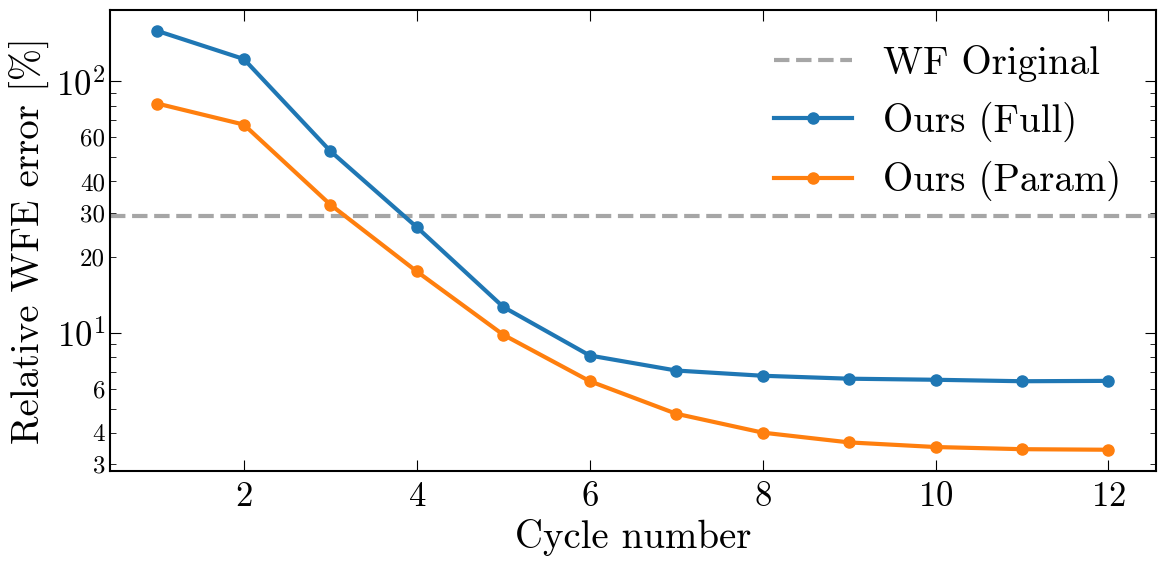

In [11]:
# OPD
cmap = plt.get_cmap('tab10')

text_fontsize = 28
maj_tick_size = 25
min_tick_size = 18

plt.figure(figsize=(12,6))

ax = plt.gca()

# plt.plot(
#     np.arange(1,len(test_opd_rel_results[0])+1),
#     4. * np.ones(len(test_opd_rel_results[0])),
#     color='black',
#     linestyle='--',
#     marker='',
#     alpha=0.5
# )

# Plot original results as horizontal 
plt.axhline(
    y=opd_original_median,
    # xmin=0.04,
    # xmax=0.96,
    color='gray',
    linestyle='--',
    label='WF Original',
    linewidth=3,
    alpha=0.7
)

for it, res in enumerate(test_opd_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )


# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel(r'Relative WFE error [%]', fontsize=text_fontsize)
plt.xlabel(r'Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3, 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_opd_error.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Pixel error at observation resolution

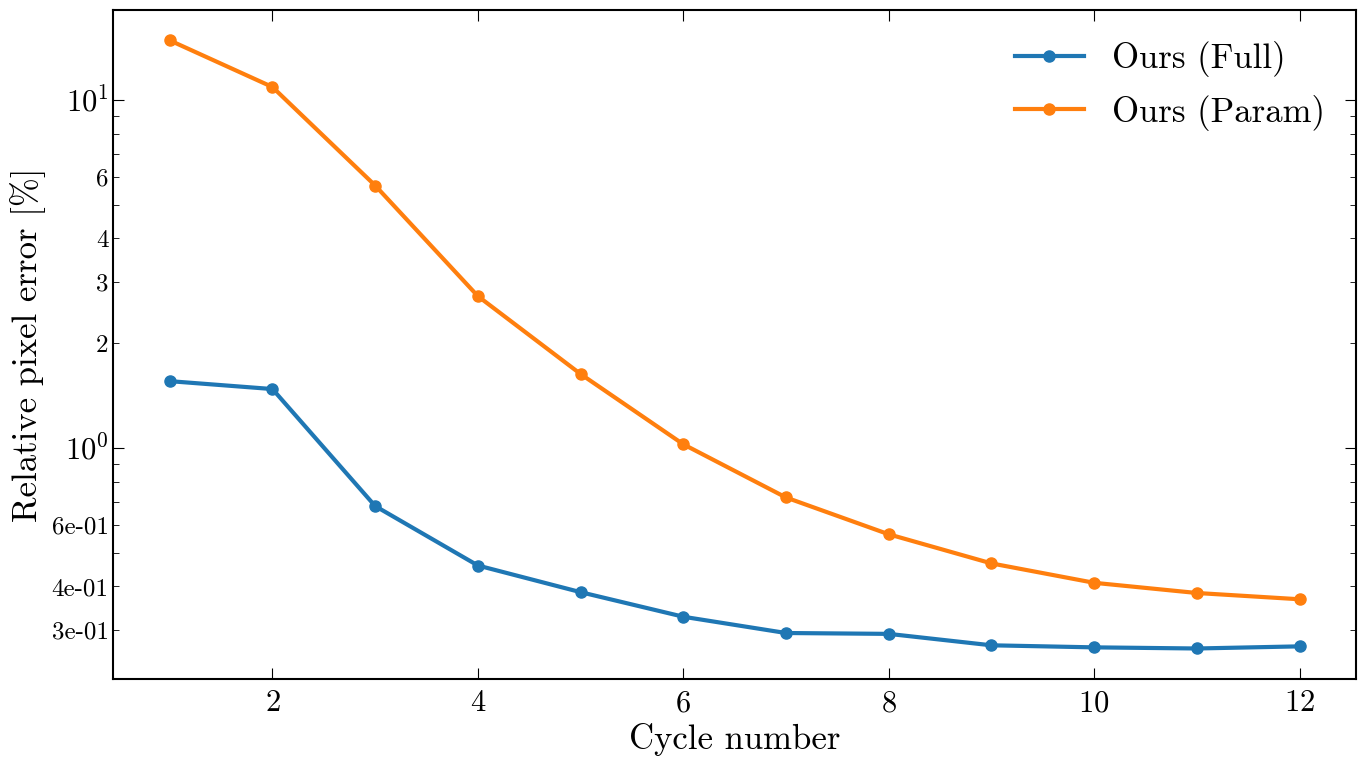

In [12]:

# Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(14,8))
ax = plt.gca()

# plt.plot(
#     np.arange(1,len(test_pix_rel_results[0])+1),
#     0.3 * np.ones(len(test_pix_rel_results[0])),
#     color='black',
#     linestyle='--',
#     marker='',
#     alpha=0.5
# )

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel(r'Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel(r'Cycle number', fontsize=text_fontsize)


ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))

ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_obsRes.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Pixel error at super resolution (x3)

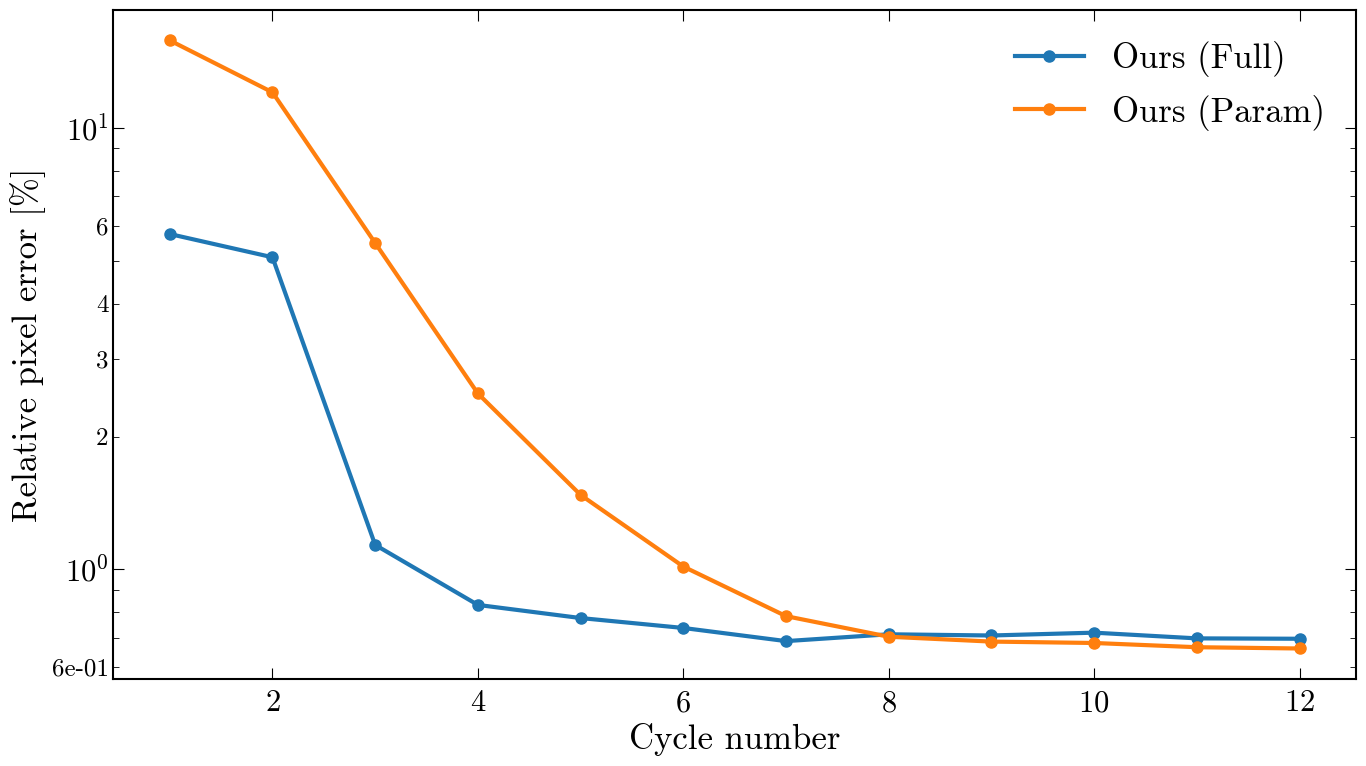

In [13]:


# SR Pixel
cmap = plt.get_cmap('tab10')

text_fontsize = 25
maj_tick_size = 22
min_tick_size = 18

plt.figure(figsize=(14,8))
ax = plt.gca()

# plt.plot(
#     np.arange(1,len(test_SR_pix_rel_results[0])+1),
#     0.6 * np.ones(len(test_SR_pix_rel_results[0])),
#     color='black',
#     linestyle='--',
#     marker='',
#     alpha=0.5
# )

for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
ax.yaxis.set_minor_formatter(formatter)

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_SuperRes.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Both resolutions

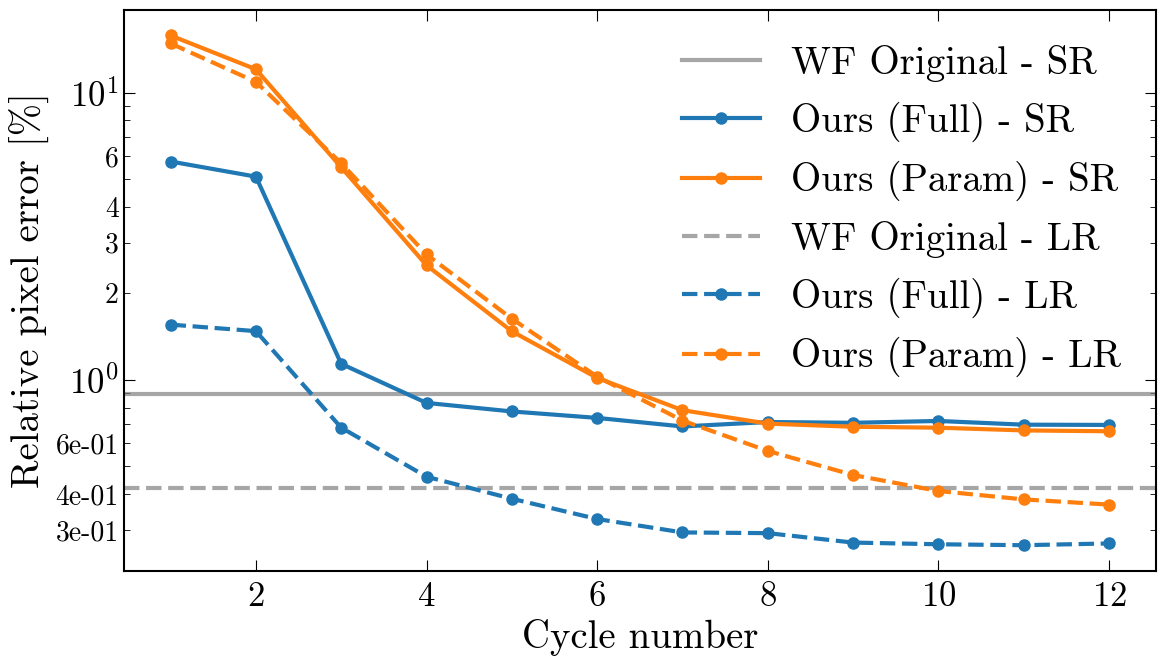

In [15]:
labels_SR = [
    'Ours (Full) - SR',
    'Ours (Param) - SR',
]
labels_obsR = [
    'Ours (Full) - LR',
    'Ours (Param) - LR',
]

# Both pixel resolutions
cmap = plt.get_cmap('tab10')

text_fontsize = 28
maj_tick_size = 25
min_tick_size = 20

plt.figure(figsize=(12,7))
ax = plt.gca()

# Plot the original results as horizontal
plt.axhline(
    y=SR_pixel_original_median,
    # xmin=0.04,
    # xmax=0.96,
    color='gray',
    linestyle='-',
    label='WF Original - SR',
    linewidth=3,
    alpha=0.7
)


for it, res in enumerate(test_SR_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_SR[it],
        linewidth=3,
        markersize=16,
        marker=".",
    )

# Plot the original results as horizontal
plt.axhline(
    y=x1_pixel_original_median,
    # xmin=0.04,
    # xmax=0.96,
    color='gray',
    linestyle='dashed',
    label='WF Original - LR',
    linewidth=3,
    alpha=0.7
)

for it, res in enumerate(test_pix_rel_results):
    plt.plot(
        np.arange(1,len(res)+1),
        res,
        color=cmap(it),
        label=labels_obsR[it],
        linestyle='dashed',
        linewidth=3,
        markersize=16,
        marker=".",
    )

# ax.set_ylim(1, 200)
ax.set_yscale('log')
# ax.yaxis.tick_left()
plt.legend(fontsize=text_fontsize)
plt.ylabel('Relative pixel error [%]', fontsize=text_fontsize)
plt.xlabel('Cycle number', fontsize=text_fontsize)

ax.tick_params(axis='both', which='major', labelsize=maj_tick_size)
ax.tick_params(axis='y', which='minor', labelsize=min_tick_size)
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 0.4))
# formatter = mtick.LogFormatterSciNotation(labelOnlyBase=False, minor_thresholds=(3., 0.4))
formatter = mtick.LogFormatter(labelOnlyBase=False, minor_thresholds=(3., 1.))

# formatter = mtick.FormatStrFormatter('%.1f')
ax.yaxis.set_minor_formatter(formatter)

# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_pixel_error_bothRes.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()

## Shape metrics: e1, e2

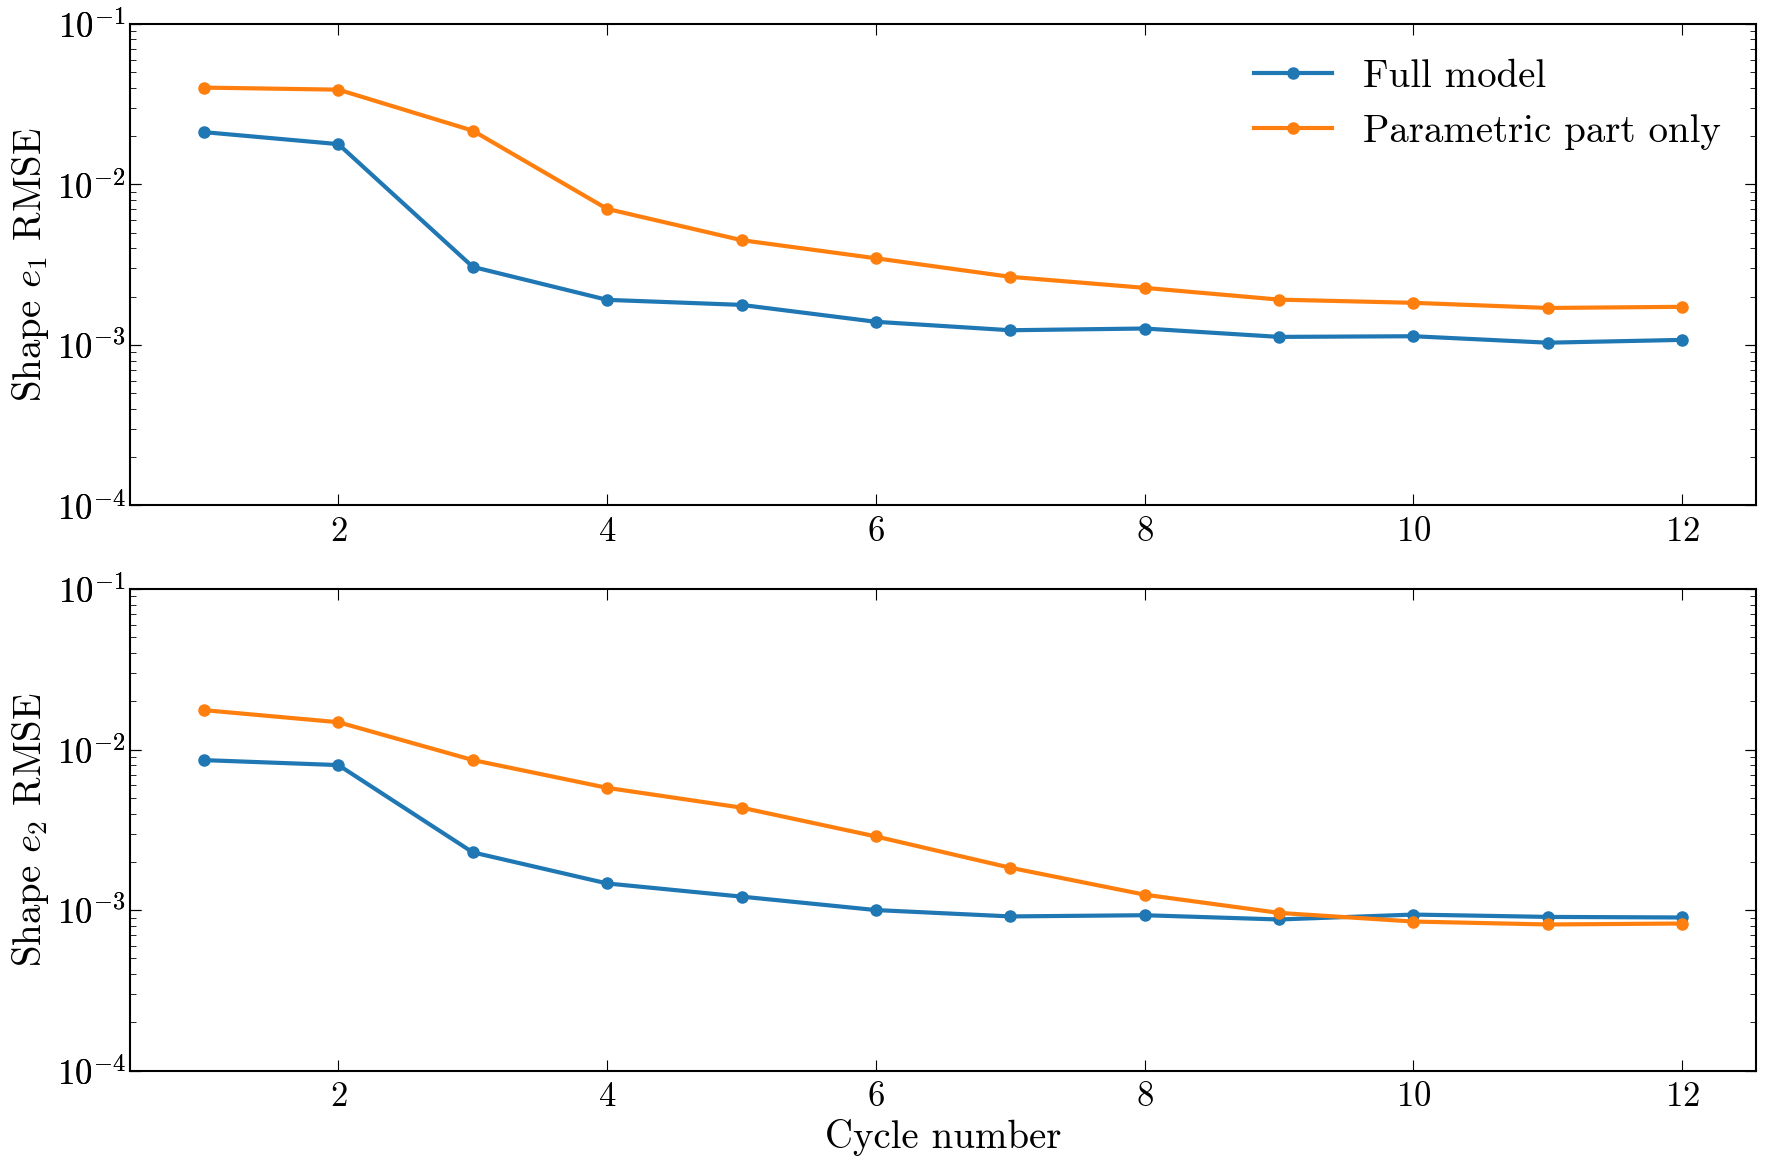

In [16]:

ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

# Define style
# define_plot_style()

fig = plt.figure(figsize=(18,12))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.08) 


# sns.set(font_scale=1.5)

ax0 = plt.subplot(gs[0])


kwargs = dict(linewidth=3, alpha=1)

ax0.plot(
    ncycles,
    full_NP_model_e1_rmse,
    c=cmap(0),
    label='Full model',
    markersize=16,
    marker=".",
    **kwargs
)
ax0.plot(
    ncycles,
    param_NP_model_e1_rmse,
    c=cmap(1),
    label='Parametric part only',
    markersize=16,
    marker=".",
    **kwargs
)


ax0.set_ylim(1e-4, 1e-1)  # most of the data

ax0.legend(prop={'size': text_fontsize})#, loc='upper right')

ax0.set_yscale('log')
# ax0.set_xscale('log')
# plt.xticks(ncycles)
ax0.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax0.get_xaxis().set_tick_params(which='minor', size=0)
ax0.get_xaxis().set_tick_params(which='minor', width=0) 

# ax0.spines['bottom'].set_visible(False)
# ax0.spines['top'].set_visible(False)

# ax0.xaxis.tick_bottom()
# ax0.yaxis.tick_left()

# plt.minorticks_on()
ax0.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax0.yaxis.major.formatter._useMathText = True
ax0.xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax0.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax0.yaxis.set_minor_locator(locmin)
ax0.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax0.tick_params(axis='both', which='major', labelsize=maj_tick_size)
# ax0.tick_params(axis='y', which='major', labelsize=maj_tick_size)
# ax0.tick_params(axis='x', which='major', labelsize=maj_tick_size)

ax0.set_ylabel(r'Shape $e_1$ RMSE', fontsize = text_fontsize)   
# ax0.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)

# ax1.set_xlabel('Relative error in the prior [%]', fontsize = 20)

ax1 = plt.subplot(gs[1])

kwargs = dict(linewidth=3, alpha=1)

ax1.plot(
    ncycles,
    full_NP_model_e2_rmse,
    c=cmap(0),
    label='Full model',
    markersize=16,
    marker=".",
    **kwargs
)
ax1.plot(
    ncycles,
    param_NP_model_e2_rmse,
    c=cmap(1),
    label='Parametric part only',
    markersize=16,
    marker=".",
    **kwargs
)


ax1.set_ylim(1e-4, 1e-1)  # most of the data

# ax1.legend(prop={'size': 18})#, loc='upper right')

ax1.set_yscale('log')


# ax1.set_xscale('log')
# plt.xticks(ncycles)
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

# ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# ax1.xaxis.tick_bottom()
# ax1.yaxis.tick_left()

# plt.minorticks_on()
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True
ax1.tick_params(axis='both', which='major', labelsize=maj_tick_size)
# ax1.tick_params(axis='y', which='major', labelsize=maj_tick_size)
# ax1.tick_params(axis='x', which='major', labelsize=maj_tick_size)

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.set_ylabel(r'Shape $e_2$ RMSE', fontsize = text_fontsize)   
# ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Cycle number', fontsize = text_fontsize)

gs.tight_layout(fig)
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_e1e2_errors_split.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


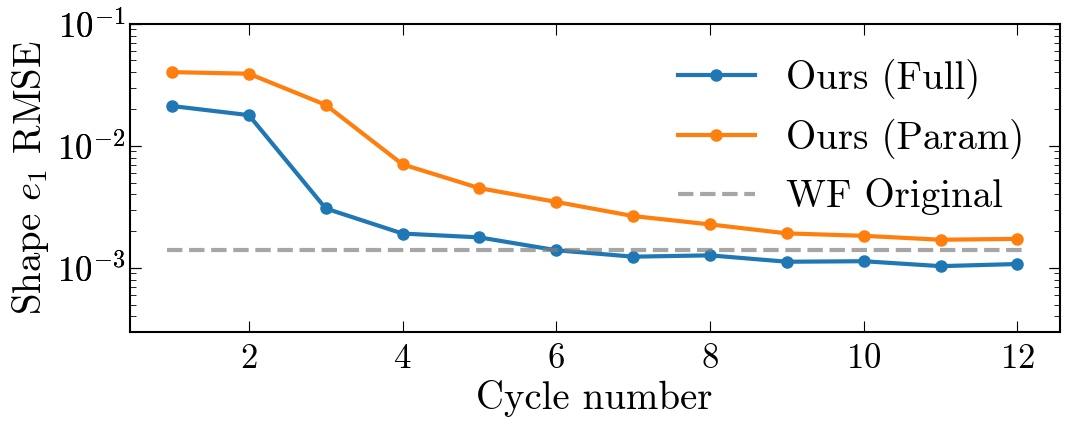

In [18]:
ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

fig = plt.figure(figsize=(12,4))

kwargs = dict(linewidth=3, alpha=1)

plt.yscale('log')

plt.gca().get_xaxis().set_major_formatter(mtick.ScalarFormatter())

plt.gca().get_xaxis().set_tick_params(which='minor', size=0)
plt.gca().get_xaxis().set_tick_params(which='minor', width=0) 
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.major.formatter._useMathText = True
plt.gca().xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
plt.gca().yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
plt.gca().yaxis.set_minor_locator(locmin)
plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.gca().tick_params(axis='both', which='major', labelsize=maj_tick_size)

plt.gca().set_ylabel(r'Shape $e_1$ RMSE', fontsize = text_fontsize)   

plt.plot(
    ncycles,
    full_NP_model_e1_rmse,
    c=cmap(0),
    label='Ours (Full)',
    markersize=16,
    marker=".",
    **kwargs
)
plt.plot(
    ncycles,
    param_NP_model_e1_rmse,
    c=cmap(1),
    label='Ours (Param)',
    markersize=16,
    marker=".",
    **kwargs
)

# Plot original resutls as horizontal line
plt.axhline(
    y=e1_original_median,
    xmin=0.04,
    xmax=0.96,
    color='gray',
    linestyle='--',
    label='WF Original',
    linewidth=3,
    alpha=0.7
)

plt.ylim(3e-4, 1e-1)  # most of the data

plt.xlabel('Cycle number', fontsize = text_fontsize)

plt.legend(prop={'size': text_fontsize})#, loc='upper right')

# gs.tight_layout(fig)
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_e1_errors.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


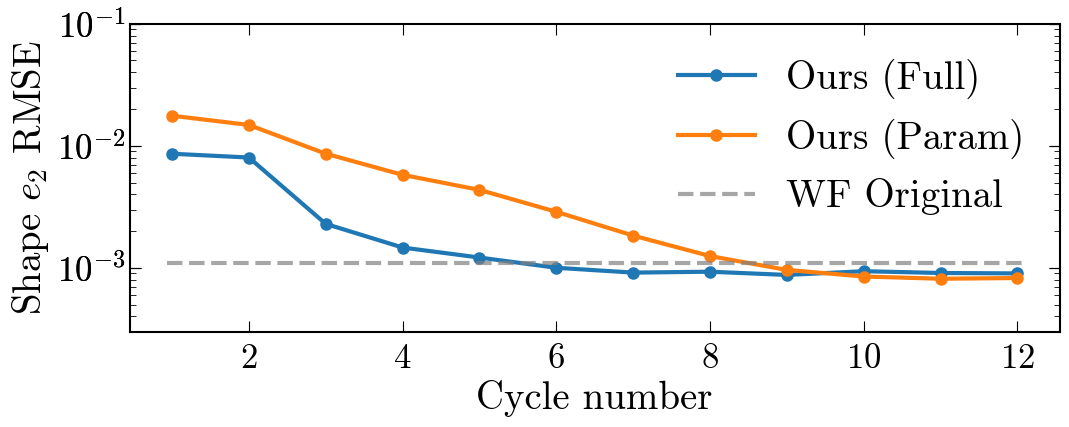

In [19]:
ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

fig = plt.figure(figsize=(12,4))

kwargs = dict(linewidth=3, alpha=1)

# plt.plot(
#     ncycles,
#     full_NP_model_e1_rmse,
#     c=cmap(0),
#     label=r'New Full - $e_1$',
#     markersize=16,
#     marker=".",
#     **kwargs
# )
# plt.plot(
#     ncycles,
#     param_NP_model_e1_rmse,
#     c=cmap(1),
#     label=r'New Param - $e_1$',
#     markersize=16,
#     marker=".",
#     **kwargs
# )

# # Plot original resutls as horizontal line
# plt.axhline(
#     y=e1_original_median,
#     xmin=0.04,
#     xmax=0.96,
#     color='gray',
#     linestyle='-',
#     label='WF Original - $e_1$',
#     linewidth=3,
#     alpha=0.7
# )

plt.yscale('log')

plt.gca().get_xaxis().set_major_formatter(mtick.ScalarFormatter())

plt.gca().get_xaxis().set_tick_params(which='minor', size=0)
plt.gca().get_xaxis().set_tick_params(which='minor', width=0) 
plt.gca().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.gca().yaxis.major.formatter._useMathText = True
plt.gca().xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
plt.gca().yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
plt.gca().yaxis.set_minor_locator(locmin)
plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.gca().tick_params(axis='both', which='major', labelsize=maj_tick_size)

plt.gca().set_ylabel(r'Shape $e_2$ RMSE', fontsize = text_fontsize)   



plt.plot(
    ncycles,
    full_NP_model_e2_rmse,
    c=cmap(0),
    label='Ours (Full)',
    markersize=16,
    marker=".",
    **kwargs
)
plt.plot(
    ncycles,
    param_NP_model_e2_rmse,
    c=cmap(1),
    label='Ours (Param)',
    markersize=16,
    marker=".",
    **kwargs
)

# Plot original resutls as horizontal line
plt.axhline(
    y=e2_original_median,
    xmin=0.04,
    xmax=0.96,
    color='gray',
    label='WF Original',
    linestyle='--',
    linewidth=3,
    alpha=0.7
)

plt.ylim(3e-4, 1e-1)  # most of the data

plt.xlabel('Cycle number', fontsize = text_fontsize)

plt.legend(prop={'size': text_fontsize})#, loc='upper right')

# gs.tight_layout(fig)
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_e2_errors.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()


## Shape metrics: R2

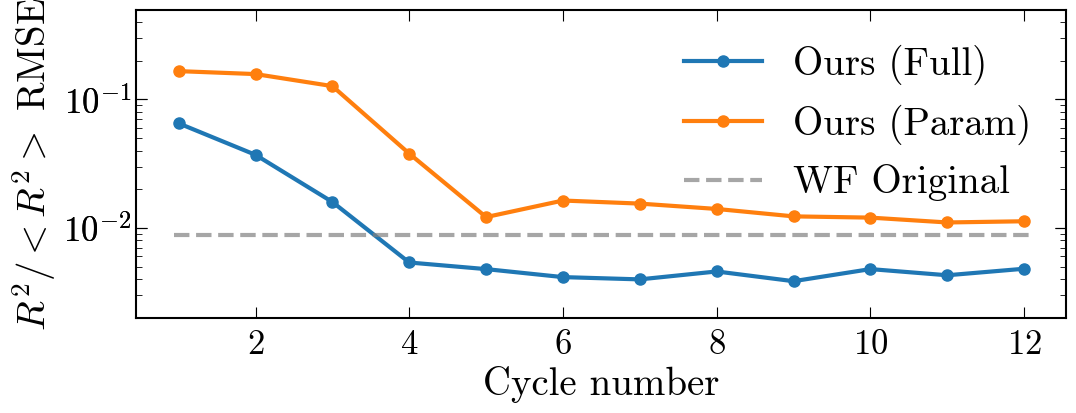

In [20]:

ncycles = np.arange(1,len(test_SR_pix_rel_results[0])+1)

# Define style
# define_plot_style()
# sns.set(font_scale=1.5)


fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=3, alpha=1)



ax1.set_yscale('log')
# ax1.set_xscale('log')
# plt.xticks(prior_error_per_list[:top_el])
ax1.get_xaxis().set_major_formatter(mtick.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0) 

# ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# ax1.xaxis.tick_bottom()
# ax1.yaxis.tick_left()

# plt.minorticks_on()
ax1.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

locmaj = mpl.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax1.yaxis.set_major_locator(locmaj)
locmin = mpl.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1 )) 
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

ax1.tick_params(axis='both', which='major', labelsize=maj_tick_size)

ax1.set_ylabel('${R^2}/{<R^2>}$ RMSE', fontsize = text_fontsize)

ax1.plot(
    ncycles,
    full_NP_model_rmse_R2_meanR2,
    c=cmap(0),
    markersize=16,
    marker=".",
    label='Ours (Full)',
    **kwargs
)
ax1.plot(
    ncycles,
    param_NP_model_rmse_R2_meanR2,
    c=cmap(1),
    label='Ours (Param)',
    markersize=16,
    marker=".",
    **kwargs
)

# Plot original resutls as horizontal line
ax1.axhline(
    y=R_original_median,
    xmin=0.04,
    xmax=0.96,
    color='gray',
    label='WF Original',
    linestyle='--',
    linewidth=3,
    alpha=0.7
)

ax1.legend(prop={'size': text_fontsize})#, loc='upper right')
ax1.set_ylim(2e-3, 5e-1)  # most of the data

# ax1.yaxis.set_label_coords(-0.05, 0.5, transform=ax1.transAxes)
ax1.set_xlabel('Cycle number', fontsize = text_fontsize)

# plt.tight_layout()
if plot_results:
    plt.savefig(
        '{:s}{:s}'.format(save_dir, 'cycle_evol_rel_R2_error.pdf'),
        bbox_inches='tight',
        dpi=300
    )
plt.show()

